In [150]:
import numpy as np
import matplotlib.pylab as plt
from scipy import optimize
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


##1 
Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo 
$\theta$ cambia con una rapidez constante de : 

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}

Al final de t segundos, la posición del objeto esta dada por: 


\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2} -\sin\omega t\right)
\end{equation}


Suponga que la partícula se desplazo 0.51m en 1s. Encuentre, con una exactitud de $10^{-5}$, la rapidez $\omega$ con que $\theta$ cambia. Suponga que $g=9.76m/s$

In [167]:
#definimos la constante
g=9.76
x=0.51
t=1
f=lambda w: (-g/(2*w**2))*((np.e**(w*t)-np.e**(-w*t))/2-np.sin(w*t))-x


In [168]:
# graficamos la funcion para valores arbitrarios de w
w=np.linspace(-2*np.pi,2*np.pi,100)
df = pd.DataFrame({ "w": w, "f_w": f(w)  })

In [169]:
df

,w,f_w
0,-6.283185,32.586440
1,-6.156252,29.871871
2,-6.029319,27.407441
3,-5.902386,25.169493
4,-5.775453,23.136633
...,...,...
95,5.775453,-24.156633
96,5.902386,-26.189493
97,6.029319,-28.427441
98,6.156252,-30.891871


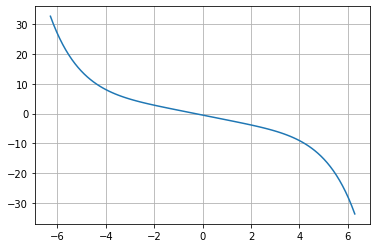

In [170]:
plt.plot(df.w,df.f_w)
plt.grid()

los parametros del metodo de biseccion son:

1. La funcion a la que queremos hallarle la raiz
2. Un intervalo (a,b) donde queremos encontrar el cero de la funcion
3. xtol que es la tolerancia de error que queremos

Entre otros.


In [171]:
raiz= optimize.bisect(f,-1,-0.01,xtol=10E-5)

In [172]:
print(f"el valor de la rapidez ω es {raiz} rad/s")

el valor de la rapidez ω es -0.3135137939453125 rad/s


Error en funcion del numero de iteraciones.

In [184]:
def Bisection( f, a, b, Nmax, printer=False ):
    """
    Find the root of function f between a and b
    
    f: function
    a,b: the initial interval
    Nmax: Nmax de interations
    printer: bool, to print internal steps
    """
    #verifying the STEP1, a and b with different signs
    #import sys
    if f(a)*f(b)>0:
        raise Exception("Error, f(a) and f(b) should have opposite signs")
        return False
    #Assigning the current extreme values, STEP2
    ai = a
    bi = b
    #Iterations
    n = 1
    while n<=Nmax:
        #Bisection, STEP3
        pi = (ai+bi)/2.0
        #Evaluating function in pi, STEP4 and STEP5
        if printer:
            print(f"Value for {n} iterations: {pi}")
            print(f" El error es {raiz-pi}")
        #Condition A
        if f(pi)*f(ai)>0:
            ai = pi
        #Condition B
        elif f(pi)*f(ai)<0:
            bi = pi
        #Condition C: repeat the cycle
        n+=1
    #Final result
    return pi

In [185]:
result=Bisection(f,-1,-0.01,20,printer=True)
print ( "Real value:", raiz)
print ( "Absolute error", abs(raiz-result)) 

Value for 1 iterations: -0.505
 El error es 0.19148620605468752
Value for 2 iterations: -0.2575
 El error es -0.05601379394531247
Value for 3 iterations: -0.38125
 El error es 0.0677362060546875
Value for 4 iterations: -0.31937499999999996
 El error es 0.0058612060546874845
Value for 5 iterations: -0.2884375
 El error es -0.025076293945312467
Value for 6 iterations: -0.30390625
 El error es -0.009607543945312491
Value for 7 iterations: -0.311640625
 El error es -0.0018731689453124756
Value for 8 iterations: -0.3155078125
 El error es 0.0019940185546875044
Value for 9 iterations: -0.31357421875
 El error es 6.042480468754219e-05
Value for 10 iterations: -0.312607421875
 El error es -0.0009063720703124667
Value for 11 iterations: -0.3130908203125
 El error es -0.00042297363281246225
Value for 12 iterations: -0.31333251953125
 El error es -0.00018127441406246003
Value for 13 iterations: -0.31345336914062505
 El error es -6.0424804687431166e-05
Value for 14 iterations: -0.31351379394531254

#2

Determinar el ángulo del sector circular que es igual a un cuarto del área de la circunferencia

\begin{equation}
A = r^2 \frac{\theta}{2} - \frac{r^2}{2} \sin(\theta)
\end{equation}


\begin{equation}
\frac{\pi r^2}{4} = r^2 \frac{\theta}{2} - \frac{r^2}{2} \sin(\theta)
\end{equation}


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}



\begin{equation}
f(\theta) =\theta - \sin \theta - \frac{\pi}{2}=0
\end{equation}



In [186]:
f= lambda theta: theta-np.sin(theta)-np.pi/2

In [187]:
theta=np.linspace(-2*np.pi,2*np.pi,100)
datos=pd.DataFrame({"theta": theta, "f_theta":f(theta)})

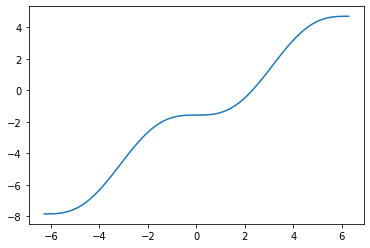

In [188]:
plt.plot(datos.theta, datos.f_theta)

In [189]:
raiz=optimize.bisect(f,0,4)

In [190]:
print(f"el angulo del sector circular que es igual a un cuarto del area de la circunferencia es {raiz} radianes")

el angulo del sector circular que es igual a un cuarto del area de la circunferencia es 2.309881460010729 radianes


error en funcion de iteraciones

In [194]:
Bisection(f,0,4,20,printer=True)
print(f"valor real:{raiz} ")

Value for 1 iterations: 2.0
 El error es 0.3098814600107289
Value for 2 iterations: 3.0
 El error es -0.6901185399892711
Value for 3 iterations: 2.5
 El error es -0.19011853998927108
Value for 4 iterations: 2.25
 El error es 0.059881460010728915
Value for 5 iterations: 2.375
 El error es -0.06511853998927108
Value for 6 iterations: 2.3125
 El error es -0.0026185399892710848
Value for 7 iterations: 2.28125
 El error es 0.028631460010728915
Value for 8 iterations: 2.296875
 El error es 0.013006460010728915
Value for 9 iterations: 2.3046875
 El error es 0.005193960010728915
Value for 10 iterations: 2.30859375
 El error es 0.0012877100107289152
Value for 11 iterations: 2.310546875
 El error es -0.0006654149892710848
Value for 12 iterations: 2.3095703125
 El error es 0.0003111475107289152
Value for 13 iterations: 2.31005859375
 El error es -0.00017713373927108478
Value for 14 iterations: 2.309814453125
 El error es 6.700688572891522e-05
Value for 15 iterations: 2.3099365234375
 El error es 

##3

Resolver la siguiente situación.

En el diseño de los vehiculos para todo tipo de terreno,  es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo 
intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.



La figura muestra las componentes asociados al segundo tipo  de falla. En ella se indeca el ángulo máximo $\alpha$ que puede alcanzar un vehiculo cuando $\beta$ es el angulo maximo en que no ocurre la falla 
por rozamiento y satisface la siguiente ecuación: 


\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}

donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}

\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}

\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}


Para $l=89$pulg, $h=49$pul, $D=55$, $\beta=11.5$ , el angulo se aproximara a 33. Verificar este resultados


In [203]:
l=89
h=49
D=55
betha=np.deg2rad(11.5)

In [204]:
A=l*np.sin(betha)
B=l*np.cos(betha)
C=(h+0.5*D)*np.sin(betha)-0.5*D*np.tan(betha)
E=(h+0.5*D)*np.cos(betha)-0.5*D



In [205]:
def f(alpha):
  X1=A*np.sin(alpha)*np.cos(alpha)
  X2=B*np.sin(alpha)**2
  X3=C*np.cos(alpha)
  X4=E*np.sin(alpha)
  f=X1+X2-X3-X4
  return f

In [206]:
alpha=np.linspace(-2*np.pi,2*np.pi,100)
datos1=pd.DataFrame({"alpha": alpha, "f_alpha": f(alpha)})


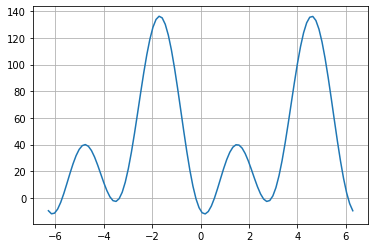

In [207]:
plt.plot(datos1.alpha,datos1.f_alpha)
plt.grid()

In [208]:
raiz=optimize.bisect(f,0,1)

In [209]:
print(f"el angulo maximo cuando β es maximo es {np.rad2deg(root)}")

el angulo maximo cuando β es maximo es 32.972174822366384


In [210]:
Bisection(f,0,1,20,printer=True)
print(f"valor real:{raiz} ")

Value for 1 iterations: 0.5
 El error es 0.07547301219346991
Value for 2 iterations: 0.75
 El error es -0.1745269878065301
Value for 3 iterations: 0.625
 El error es -0.04952698780653009
Value for 4 iterations: 0.5625
 El error es 0.012973012193469913
Value for 5 iterations: 0.59375
 El error es -0.018276987806530087
Value for 6 iterations: 0.578125
 El error es -0.0026519878065300873
Value for 7 iterations: 0.5703125
 El error es 0.005160512193469913
Value for 8 iterations: 0.57421875
 El error es 0.0012542621934699127
Value for 9 iterations: 0.576171875
 El error es -0.0006988628065300873
Value for 10 iterations: 0.5751953125
 El error es 0.00027769969346991275
Value for 11 iterations: 0.57568359375
 El error es -0.00021058155653008725
Value for 12 iterations: 0.575439453125
 El error es 3.3559068469912745e-05
Value for 13 iterations: 0.5755615234375
 El error es -8.851124403008725e-05
Value for 14 iterations: 0.57550048828125
 El error es -2.7476087780087255e-05
Value for 15 iterati